In [3]:
from scipy.constants import physical_constants as pc
import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxwab
import timeit

## Puits de potentiel

Pour une particule quantique de masse $m$ étant dans un puits de potentiel de largeur $w$ et de hauteur $V$, les énergies permises $E$ sont solutions de 

\begin{align}
\tan \sqrt{w^2mE/2\hbar^2} = 
\begin{cases}
\sqrt{(V-E)/E}, & \text{états pairs}\\
-\sqrt{E/(V-E)}, & \text{états impairs}
\end{cases}
\end{align}

où l'état fondamental est l'état 0, le premier état excité est l'état 1 et ainsi de suite.
### d) Évaluation qualitative des niveaux d'énergie

Pour un électron dans un puits de potentiel d'une hauteur de $20 eV$ et d'une largeur de $1 nm$, on tracera le comportement des solutions transcendantes ci-haut. Nous considérons, 

\begin{align}
y_1 = \tan \sqrt{w^2mE/2\hbar^2}, \quad y_2 = \sqrt{(V-E)/E}, \quad y_3 = -\sqrt{E/(V-E)} 
\end{align}

et nous ferons varier l'énergie $E$ entre $0$ et $20\ eV$ afin d'approximer qualitativement les 6 premiers niveaux d'énergie. Ceux-ci correspondent aux intersections entre $y_2$ et $y_1$ pour les états pairs, ainsi que celles entre $y_3$ et $y_1$ pour les états impairs.  


In [2]:
%matplotlib inline
def y1(E, w=1e-9, m=9.1094e-31):
    hbar = pc['Planck constant over 2 pi'][0]
    E = E * 1.6022e-19 # Conversion eV -> Joules
    return np.tan(np.sqrt((w**2*m*E/(2*hbar**2))))

def y2(E, V=20):
    return np.sqrt((V-E)/E)

def y3(E, V=20):
    return -1*np.sqrt(E/(V-E))
    
    
E = np.linspace(0.001, 19.999, 10000)
res_1 = y1(E)
res_2 = y2(E)
res_3 = y3(E)

res_1[:-1][np.diff(res_1) < 0] = np.nan


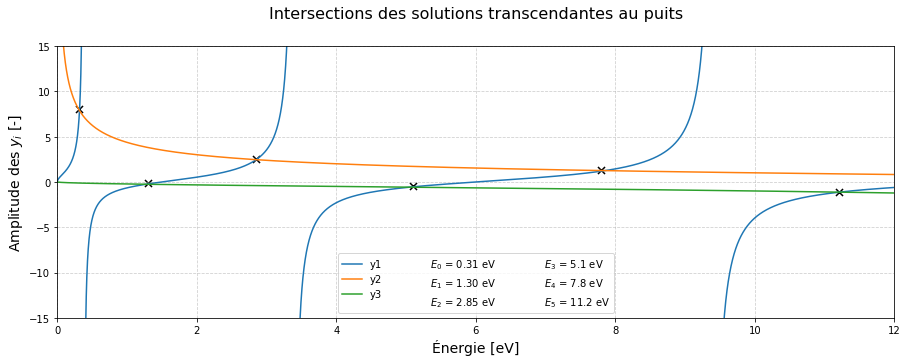

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(E, res_1, label='y1')
ax.plot(E, res_2, label='y2')
ax.plot(E, res_3, label='y3')

plt.scatter(0.31, 8, c='k', marker='x', s= 50, label='$E_0$ = 0.31 eV')
plt.scatter(1.3, -0.1, c='k', marker='x', s= 50, label='$E_1$ = 1.30 eV')
plt.scatter(2.85, 2.5, c='k', marker='x', s= 50, label='$E_2$ = 2.85 eV')
plt.scatter(5.1, -0.4, c='k', marker='x', s= 50, label='$E_3$ = 5.1 eV')
plt.scatter(7.8, 1.3, c='k', marker='x', s= 50, label='$E_4$ = 7.8 eV')
plt.scatter(11.2, -1.1, c='k', marker='x', s= 50, label='$E_5$ = 11.2 eV')

plt.grid(which='Major', ls='--', alpha=0.6)
leg = plt.legend(ncol=3)
for item in leg.legendHandles[3:]:
    item.set_visible(False)
plt.ylim(-15, 15)
plt.xlim(0, 12)
plt.ylabel('Amplitude des $y_i$ [-]', fontsize=14)
plt.xlabel('Énergie [eV]', fontsize=14)
plt.title('Intersections des solutions transcendantes au puits', fontsize=16, y=1.08)
plt.show()

### e)

Ayant identifié les les énergies permises de façon qualitative, il nous faut maintenant retrouver ces derniers avec un approche plus rigoureuse: la bissection. Cette méthode sert à trouver les racines d'une fonction à partir de deux points de départ, $x_1$ et $x_2$, dont la fonction évaluée à $x_2$ est de signe opposée à cette dernière évaluée à $x_2$. On prend alors le point central $x'$ entre $x_1$ et $x_2$ et calculons $f(x')$. Si cette valeur est de même signe que $f(x_1)$, alors $x_1$ devient $x'$; $x_2$ devient $x'$ si autrement. Bref, si la distance $|x_1 - x_2| < \epsilon$, on retourne $x'$ sinon on recommence le processus itératif jusqu'à convergence de la solution. 

Dans notre cas , on cherche les zéros des fonctions $f(E) = y_1 - y_2$ et $g(E) = y_1 - y_3$ qui sont présentés dans la figure ci-dessous. 

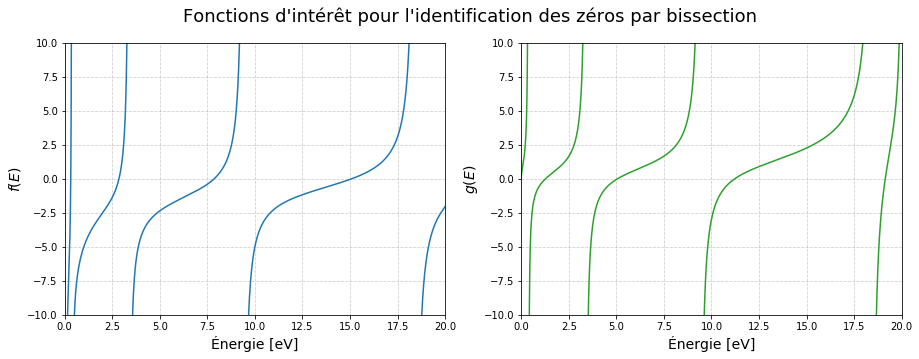

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(E, res_1 - res_2)

ax1.set_ylabel('$f(E)$', fontsize=14)
ax1.set_xlabel('Énergie [eV]', fontsize=14)
ax1.set_ylim(-10, 10)
ax1.set_xlim(0, 20)

ax2.plot(E, res_1 - res_3, c='C2')

ax2.set_ylabel('$g(E)$', fontsize=14)
ax2.set_xlabel('Énergie [eV]', fontsize=14)
ax2.set_ylim(-10, 10)
ax2.set_xlim(0, 20)

ax1.grid(which='Major', ls='--', alpha=0.6)
ax2.grid(which='Major', ls='--', alpha=0.6)

fig.suptitle("Fonctions d'intérêt pour l'identification des zéros par bissection", fontsize=18)
plt.show()

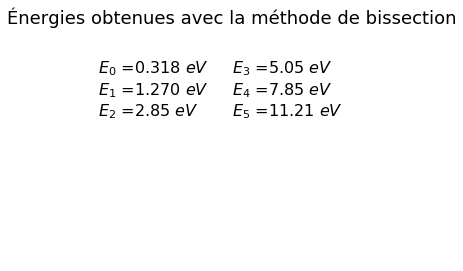

In [5]:
def bissection(y, x, a, b, tol, Nmax=1000):
    N=0
    while N <= Nmax:
    
        i = np.argmin(abs(x-a))
        f = np.argmin(abs(x-b))
        
        if np.sign(y[i]) != np.sign(y[f]):
            c = (a+b)/2

            if abs(a - b) < tol:
                break

            else:    
                k = np.argmin(abs(x-c))
                if np.sign(y[i]) == np.sign(y[k]) :
                    a = c
                elif np.sign(y[f]) == np.sign(y[k]):
                    b = c
                    
        N += 1
    
    return c
            
E_0 = bissection(res_1-res_2, E, 0.001, 0.35, 0.001)    
E_2 = bissection(res_1-res_2, E, 1, 3, 0.001)
E_4 = bissection(res_1-res_2, E, 7, 9, 0.001)

E_1 = bissection(res_1-res_3, E, 1, 2, 0.001)    
E_3 = bissection(res_1-res_3, E, 4, 6, 0.001)
E_5 = bissection(res_1-res_3, E, 10, 12, 0.001)

plt.title('Énergies obtenues avec la méthode de bissection', fontsize=18)

plt.text(0.1, 0.8, r"$E_0$ ="+ str(np.round(E_0, 3)) + ' $eV$', fontsize=16)
plt.text(0.1, 0.7, r"$E_1$ ="+ str(np.round(E_1, 3)) + '0' + ' $eV$', fontsize=16)
plt.text(0.1, 0.6, r"$E_2$ ="+ str(np.round(E_2, 3)) + ' $eV$', fontsize=16)
plt.text(0.5, 0.8, r"$E_3$ ="+ str(np.round(E_3, 3)) + ' $eV$', fontsize=16)
plt.text(0.5, 0.7, r"$E_4$ ="+ str(np.round(E_4, 3)) + ' $eV$', fontsize=16)
plt.text(0.5, 0.6, r"$E_5$ ="+ str(np.round(E_5, 2)) + ' $eV$', fontsize=16)
plt.axis('off')
plt.show()


Bref, avec une précision $\epsilon$ de $0.001\ eV$, la méthode par bissection nous retourne des valeurs d'énergies qui sont très près des valeurs prédites par l'approche qualitative (Voir valeurs ci-haut). Un bémol de cette technique est l'identification manuelle des points de départ. Par exemple, pour l'énergie du niveau fondamental, trouver un point où la fonction était positive était laborieux. Il serait donc d'intérêt de créer une méthode plus robuste d'indentification de racines d'une fonction qui ne nécessitrait pas d'intervention humaine dans l'identification des points de départ. 

## Ampoule incandescante

### f)
La distribution spectrale $I(\lambda)$ de l'émission du filament de tungstène d'une ampoule incadescante à température $T$ s'exprime comme

\begin{align}
I(\lambda) = 2\pi A hc^2 \frac{\lambda^{-5}}{e^{hc/\lambda k_B T}-1}
\end{align}

où $A$ est la surface du filament, $h$ la constante de Planck, $c$ la vitesse de la lumière et $k_B$ la constante de Boltzmann.

La majorité de la puissance consommée par l'ampoule sera émise en rayonnement, mais ce dernier ne sera pas seulement dans le visible. On définit alors l'efficacité $\eta$ de l'ampoule comme le ratio entre le rayonnement émis dans la plage du visible (i.e. entre $\lambda_1 = 390$nm et $\lambda_2 = 750$nm) et le rayonnement total. On l'exprime donc comme, 

\begin{align}
\eta = \frac{15}{\pi^4}\int_{hc/\lambda_2 k_B T}^{hc/\lambda_1 k_B T} \frac{x^3}{e^x - 1},
\end{align}

avec $x = hc/\lambda k_B T$. On cherche ici à implémenter une méthode prenant une température en entrée et qui calculera l'efficacité lumineuse à partir de la quadrature gaussienne de Newmann.

In [90]:
def get_bounds(T):
    k_B   = pc['Boltzmann constant'][0] # J K^-1
    h     = pc['Planck constant'][0]    # J s
    c     = 3e8                      # m s^-1
    c     =  pc['speed of light in vacuum'][0]       # m s^-1

    lam_1 = 390e-9
    lam_2 = 750e-9
    
    b = h*c/(lam_1*k_B*T)
    a = h*c/(lam_2*k_B*T)
    
    return a, b

def efficacite(T):
    
    a, b = get_bounds(T)
    
    N = 100
    
    x, w = gaussxwab(N, a, b)
    
    eta = (15/np.pi**4)*sum((w*x**3/(np.exp(x)-1)))
    
    return eta

#T = 6000
T = np.linspace(300, 10000, 9700)
res = []
for T_i in T:    
    res.append(efficacite(T_i))

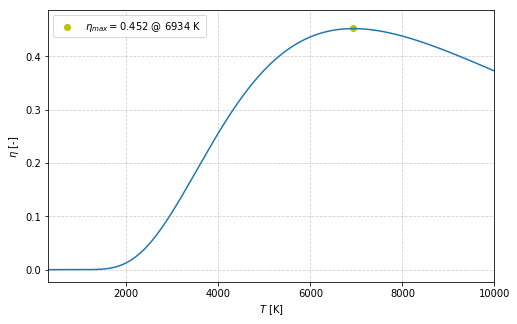

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
x = np.round(T[np.where(res == max(res))[0]][0])
y = np.round(np.max(res), 3)
plt.scatter(x, y, c='y', label=r'$\eta_{max}=$'+str(y)+' @ '+str(x)[:-2]+' K')
plt.plot(T, res)
plt.ylabel(r'$\eta$ [-]')
plt.xlabel(r'$T$ [K]')
plt.xlim(300, 10000)
plt.grid(which='Major', ls='--', alpha=0.6)
plt.legend()
plt.show()

Bref, suite à l'implémentation d'une méthode pouvant calculer l'efficacité d'une ampoule, on remarque que celle-ci sera maximale lorsque l'ampoule aura une température de $6934\ K$. Ainsi, lorsque le filament sera chauffé à une telle température, $45,2\%$ du rayonnement émis sera dans le spectre du visible. Comme la fonction ne possède qu'un extrêmum, l'appel de la fonction max nous a retourné l'efficacité maximale. Par contre, dans le cas où il y a plusieurs maximas et minimas, nous devons recourir à d'autres méthodes comme la descente de gradient ou le golden ration search qui seront implémentées dans les prochaines sous questions.

### g) Golden ratio search

la méthode itérative du golden ratio search sert à obtenir un minimum d'une fonction $f(x)$ (i.e. au maximum de $-f(x)$). C'est à partir de 2 points initiaux $x_1$ et $x_4$ qu'on place 2 points, $x_2$ et $x_3$, de façon symmétrique au point central entre $x_1$ et $x_4$. Cela force la condition 

\begin{align}
x_2 - x_1 = x_4 - x_3.
\end{align}

En s'intéressant à l'évolution de la largeur de domaine considéré en fonction de l'itération, on peut définir la quantité $z$ 

\begin{align}
z = \frac{x_4 - x_1}{x_3 - x_1} = \frac{x_1 - x_4}{x_2 - x_4}.
\end{align}

en combinant les deux équations et suite à un peu d'algèbre, on obtient le golden ratio, 

\begin{align}
z = \frac{1 + \sqrt{5}}{2}.
\end{align}

Initialement, les positions $x_2$ et $x_3$ sont définies comme 

\begin{align}
x_3 = x_1 + \frac{x_4 - x_1}{z}, \ \ \ \  x_2 = x_4 - \frac{x_4 - x_1}{z},
\end{align}

Si $f(x_2) < f(x_3)$, on redéfinira $x_4$ comme étant $x_3$, $x_3$ comme étant $x_2$ et on recalculera une nouvelle position pour $x_2$ à partir du golden ratio. On procédera de façon analogue dans le cas où $f(x_2) > f(x_3)$. 

Bref, une fonction suivant cette méthode est implémentée ci-bas.

In [91]:
def golden_ratio_search(f, x, x1, x4, tol):
    
    z = (1 + np.sqrt(5))/2
    
    x2 = x4 - (x4 - x1)/z
    x3 = x1 + (x4 - x1)/z
    
    i1 = np.argmin(abs(x-x1))
    i2 = np.argmin(abs(x-x2))
    i3 = np.argmin(abs(x-x3))
    i4 = np.argmin(abs(x-x4))
    
    f1 = f[i1]
    f2 = f[i2]
    f3 = f[i3]
    f4 = f[i4]
    
    while x4-x1 > tol:
        if f2 < f3:
            x4, f4 = x3, f3
            x3, f3 = x2, f2
            x2 = x2 = x4 - (x4 - x1)/z
            
            i2 = np.argmin(abs(x-x2))
            f2 = f[i2]
            
        else: 
            x1, f1 = x2, f2
            x2, f2 = x3, f3
            
            x3 = x1 + (x4 - x1)/z
            i3 = np.argmin(abs(x-x3))
            f3 = f[i3]
            
    return 0.5*(x1+x4)


def golden_ratio_search_f(f, x, x1, x4, tol, extr = -1):
    #extr = -1 si on cherche un max et 1 si on cherche un min
    z = (1 + np.sqrt(5))/2
    
    x2 = x4 - (x4 - x1)/z
    x3 = x1 + (x4 - x1)/z
    
    f1, f2, f3, f4 = extr*f(x1), extr*f(x2), extr*f(x3), extr*f(x4)
    
    while abs(x4-x1) > tol:
        
        if f2 < f3:
            x4, f4 = x3, f3
            x3, f3 = x2, f2
            x2 = x2 = x4 - (x4 - x1)/z
            
            f2 = extr*f(x2)
            
        else: 
            x1, f1 = x2, f2
            x2, f2 = x3, f3
            
            x3 = x1 + (x4 - x1)/z
            f3 = extr*f(x3)
            
    return 0.5*(x1+x4)
            
    
max_grs = golden_ratio_search(-np.array(res), T, 5000, 8000, 1)
max_grs_f = golden_ratio_search_f(efficacite, T, 5000, 8000, 1)

max_grs_test = golden_ratio_search(-np.array(res), T, 2000, 9000, 1)
print(max_grs, "   ", max_grs_f)
print(max_grs_test)
print(100*(x -  max_grs)/x)

#%timeit(golden_ratio_search(-np.array(res), T, 5000, 8000, 1))

6929.05689699     6928.53768617
6928.97036185


NameError: name 'x' is not defined

En définissant $x_1 = 5000$, $x_4 = 8000$ et une tolérance de $1\ K$, la méthode du golden ratio search nous indique que le maximum d'efficacité de la lampe au tungstène se situe à environ $6933, 975\ K$, valeur étant à un écart de $0,0004 \%$ avec la valeur de référence calculée en $f)$, et ce en un temps de calcul d'environ $3,27$ ms. 

On remarque aussi que cette méthode est sensible aux positions initiales de $x_1$ et $x_4$. En effet, si on défini $x_1 = 2000$, $x_4 = 9000$, on obtient que le maximum d'efficacité se situe à $6934,102\ K$, valeur étant à $0,002\%$ d'écart avec la valeur précédente. Malgré la faible amplitude de cet écart, ce dernier peut avoir un impact non négligeable sur la précision d'un calcul. Par exemple, lors de l'identification du maximum d'un picc de Bragg dans le contexte de la protonthérapie, un telle erreur pourrais avoir un effet sur la distance où on croit que la dose s'est déposée. Cela pourrait ainsi mener à une irradiation d'une zone saine. 

### h) 

On doit maintenant calculer la même valeur maximale avec une descente du gradient sans connaître les dérivées. l'équation est alors:
\begin{align}
x_3 = x_2 - \gamma \frac{f(x_2) - f(x_1)}{x_2 - x_1}
\end{align}
Si l'on utilise des valeurs de départ semblables à celles pour la méthode du nombre d'or ($x_1 = 5000$, $x_2 = 8000$). On prend aussi une tolérence de 1 K. Comme on cherche un maximum de la fonction, on utilise un $\gamma$ négatif, qui doit simplement être de l'ordre de grandeur de l'inverse de la dérivée seconde de la fonction pour atteindre une convergence en un temps acceptable (P. 287 computationnal physics). Comme la pente est assez lisse, nous avons exploré plusieurs valeurs de $\gamma$, et avons finalement choisi un valeur de $-5\times 10^{7}$, qui semble un bon compromis entre précision d'estimation et temps de calcul.

On obtient alors une valeur de 6927 K en moins de 0.3 secondes.

In [100]:
def gradient_descent_search(f, x, tol, gam, interval = 1e-3):
    condition = True
    x1 = x
    x2 = x + interval
    f1, f2 = f(x1), f(x2)

    while abs(x1 - x2) > tol:
        
        x3 = x2 - gam*((f2 - f1)/(x2 - x1))
        x1, x2 = x2, x3
        f1, f2 = f2, f(x3)

    return x2

max_grs = gradient_descent_search(efficacite, 5000, 1, -5e7, 3000)
print(max_grs)


6927.31058525


### i)

Il est impossible d'utiliser le tungsten à cette température, puisque sa temérature de fusion se trouve à 3695 K, et son point d'ébullition à 5828 K. On vaporiserait donc instantanément le tungsten à 6927 K, ce qui ne semble pas très plaisant pour l'utilisateur.

On utilise simplement le tungsten car il a le plus haut point de fusion de tous les métaux, et qu'il est assez abondant.